In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt

## Estimating $\pi$
\begin{align}
\frac{\text{Area of circle}}{\text{Area of square}} &= \frac{\pi r^2}{4r^2}\\
&= \frac{\pi}{4}
\end{align}

15 mins

In [2]:
num_trials = int(1e5)
r = 2

# Drawing a bunch of points in a square
samples = np.random.uniform(low=-1*r, high=r, size=(2, num_trials))

# Counting those inside the circle
dist = np.sqrt(np.sum(samples**2, axis=0))
mask = dist<=r

# Estimating pi
pi_hat = 4.*np.sum(mask)/num_trials

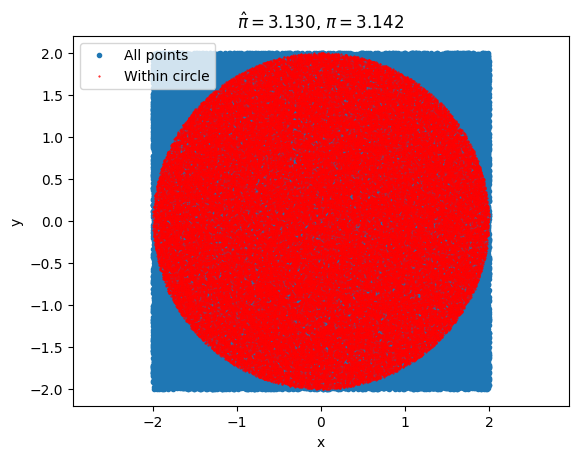

In [3]:
plt.plot(samples[0,:], samples[1,:], '.', label='All points')
plt.plot(samples[0,mask], samples[1,mask], 'r.', ms=1, label='Within circle')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title(f'$\hat{{\pi}}=${pi_hat:.3f}, $\pi=${np.pi:.3f}')
plt.legend()

## Inverse transform sampling
10 mins

In [4]:
mu, sigma = 1.1, 0.3
target_pdf = sps.norm(loc=mu, scale=sigma)

n_samples = 1000

In [5]:
yy = np.random.uniform(low=0., high=1., size=n_samples)
xx = target_pdf.ppf(yy)
xx_sorted = np.sort(xx)

Text(0, 0.5, 'PDF')

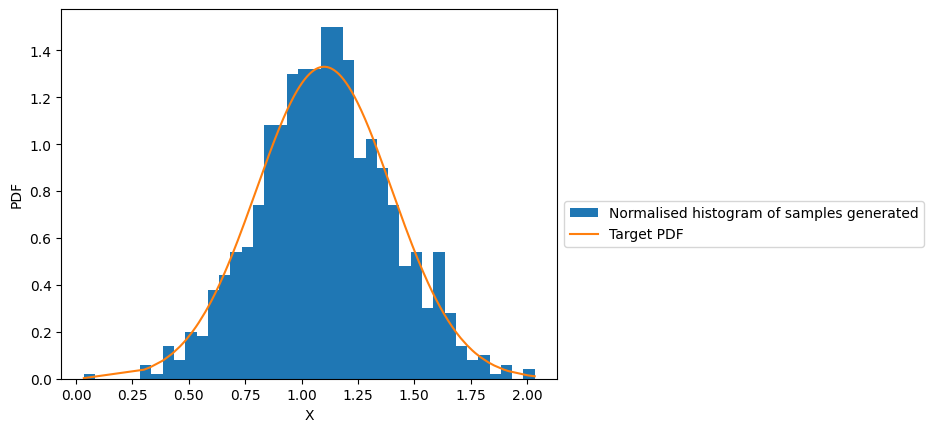

In [6]:
plt.hist(xx, bins=40, density=True, label='Normalised histogram of samples generated')
plt.plot(xx_sorted, target_pdf.pdf(xx_sorted), label='Target PDF')
plt.legend(bbox_to_anchor=(1., 0.5), loc='upper left')
plt.xlabel('X')
plt.ylabel('PDF')

## Accept-reject algorithm